In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set() #overrides the style and graphcs of all matplotlib graphs


# Important 
In order to correct analyze a single or multiple linear regression, we need to remember the 5 assumptions of a linear regression:
* 1 - Linearity - It implies a linear relationship between the variables.
* 2 - No endogeneity - The covariance of the error and x = 0 for any error and x.
* 3 - Normality(1) and homoscedasticity(2) - (1) The error term is normally distributed. The expected value of the error is zero. (2) His variance is Constant.
* 4 - No autocorrelation - The covariance between two error terms = 0.
* 5 - No multicollinearity - No correlation between the independent variables (Coeficiente de correlação diferente de 1)

# Always check for violations in the assumptions

How to check them and how to proceed:

* 1 - Linearity - Check the scatter plot. If violated, its needed to transform de data berore reestimate the linear regression. or estimate a non linear regression. 

* 2 - No endogeneity - Check the R2 adjused. Or covariance between the independent variable and the erros. If violated, it leads to omitted variable bias. In other words, we are missing some important variable. I also leads to counterintuitive conclusions.

* 3 - Normality(1) and homoscedasticity(2) - For normality, the pvalue and F-test consider nomality when calculated, so this can be checked by pvalue. About Homocedasticity, we can check the scatter plot. If violated, first look for ommited variable bias (is there an important variable been ommited?). Then check for outliers and try to remove them. If does not work, perform a log transformation in the dependent variable (y) and perform the linear regression between log(y) and the independent variable (semi-log model). Or,  perform the log transformation also in the independent variable x and estimates the linear regression with the Y variable (semi log model). If necessary, log transform both dependent and independent variables (log-log) model and we will get a % model intepretation, or elasticity.

* 4 - No autocorrelation - No serial correlation in  the error serial. Check the error plot and try to see a pattern. We also have Durbin Watson test. This tests value falls between 0 and 4. 2 means no autocorrelation. Values < 1 and values > 3 are cause of alarm. If Violated, CAN NOT be relaxed. You can not use a linear regression in this dataset. In this case we need to consider auto regressive models (AR), moving average models (MA), autorregressive moving average models (ARMA), or even ARIMA models if you find that your series has unit root. Then, after capture the integration order and correctly transform the series you can run the ARIMA model. 

* 5  -  No multicollinearity - Check for the correlation between the independent variables. Or, estimate an linear regression between them. This regression must be not statistcally significant, because it would imply a linear relationship between them.If violated we can drop one of the variables, transform them in just one (e.g avegare) or even keep them both but in this case with extra caution.


In [80]:
data = pd.read_csv('1.01.+Simple+linear+regression.csv')

In [81]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [82]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Regression


In [83]:
y = data['GPA']
x1 = data['SAT']

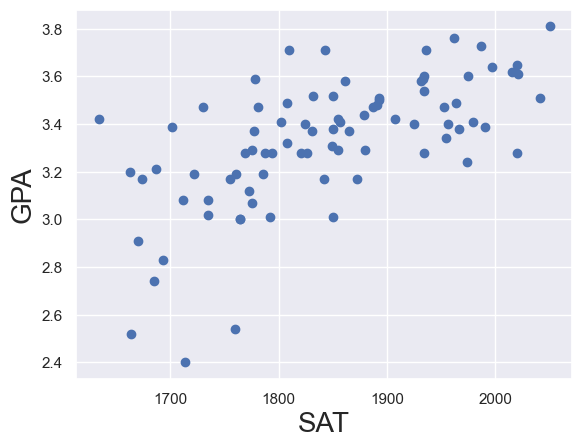

In [84]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()


# Estimating the model

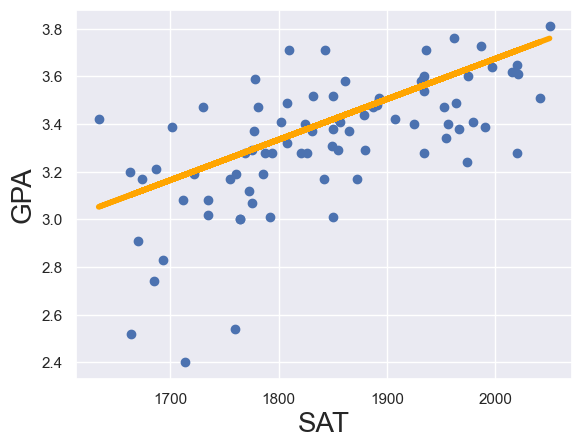

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           7.20e-11
Time:                        05:18:54   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
plt.scatter(x1,y)
yhat = 0.0017 * x1 + 0.2750
fig = plt.plot(x1, yhat, lw=4, c='orange', label="regression line" )
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
# plt.ylim(2.5,4)
# plt.xlim(1500,2200)
plt.show()


x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

# Our regression equation:

yhat = 0.0017 * x1 + 0.2750     or  GPA =   0.2750 + 0.0017 * SAT

Analysis ciretira: The lower pvalue the better: Null hipothesis -> coefficient = 0   A pvalue < 0.05 means that the coeficient is statistically significant.

For the constant (our linear coeficient), we have a pvalue = 0.503 so there is a probaliblity that this coeficient is = 0. Its not a problem here because it means that our regression line could starts from the 0 value in y axe. Not a problem at all for this model, because we already expect some causality between theese variables. 

On the anther hand, for our  angular coeficient (SAT) we have pvalue = 0.000. it means that we reject the null hipotesys of this coeficient is equal to 0. In other words, this coeficient is statisticly significant. It is a must for a reliable regression model.


# Analysis

Given some concepts:
* SST or TSS = Sum of squares total - Dispersal between the of the observable variable and the mean. 
* SSR or ESS (explained sum of squares) = Sum os quares regression - Sum of the differences between the predicted value and the mean. Measures how well the line fits the data
* SSE or RSS (residual sum of squares ) = Sum of squares error. The difference between the obervable value and the precitced value.

We have:

SST = SSR + SSE - Mathematically, the total variability of the dataset is equal to the variability explained by the regression line plus the unexplained variability, known as error.
Given a constant total variability, a lower error will cause a better regression.

R2 = SSR / SST - Measures the "explainability" of the model. Usually comes from 0.2 to 0.9.

Our model has a R2 = 0.406. It means that SAT scores explain 41% of the variability of the college grades (GPA) for our sample.
Althouhg it is a reasonable R2, we might be missing some important information. We could think in other variables to be considered such as gender, income, marital status, etc in order to improve our model. 


# Overal significance of the model

The F-value follows the F Distribution. This thest is known of the overall significance of the model.
The null hypotesis is that all the betas are equal to zero simultaneosly. The alternative hypothesis is that at least one beta differs from zero.

If all betas are equal to zero, than none os the independent variables matter and our model has no merit.

Our model has a F-statistic = 56.05 and the Prob(F-statistic) value is equal to 7.2e-11. Virtually 0.000 it means that the overall model is significant.

* This test can also help to compare the addition of new variables to the model.




# Multiple linear regression / Dummy variable

Althouth we already have have a reasonable explanatory power (41%), we can work more on the model in order to improve it:

We are going to add another variable...

One important thing to be considered here is to choose how many variables to add and if the variable worths to be added or not. For that, we compare both R2 and R2 adjusted. If R2 adjusted does not increase or even reduce, we shoud not not add the variable to the model, because in this case it would not increase the explanatory power of the regression. The p value also helps in this analysis.

Lets take the attendance percentage. The Attendance column shows if the student had more than 75% of attendance along the course. 

* Note that its a categorical variable (boolean in this case).

In [118]:
data_dummies = pd.read_csv('1.03.+Dummies.csv')
data_dummies.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


### Transforming categorical data in boolean

In [87]:
data_dummies['Attendance'] = data_dummies['Attendance'].map({'Yes':1,'No':0})
data_dummies.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


In [88]:
data_dummies.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


### The attendance mean = 0.46. It means tha we have more 0's than 1's. 

It also gives us information that only 46% of the students has achieved 75% of attendance.

Lets estimates the new linear regression includind the dummy variable: 

In [89]:
y = data_dummies['GPA']
x1 = data_dummies[['SAT', 'Attendance']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           2.19e-15
Time:                        05:18:54   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The model now is GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Dummy


#### Lets check the results:
* The P-value of both coeficients indicate that both are statistically significants;
* The prob F-statistic is vitrually zero, indicating that the overall significance of the model is good.
* The R2 rised to 0.565. Now 56% of the GPA variability is beeing explanied by GPA + Attendance.


#### Now we have 2 different lines, with dummy 0 and 1:



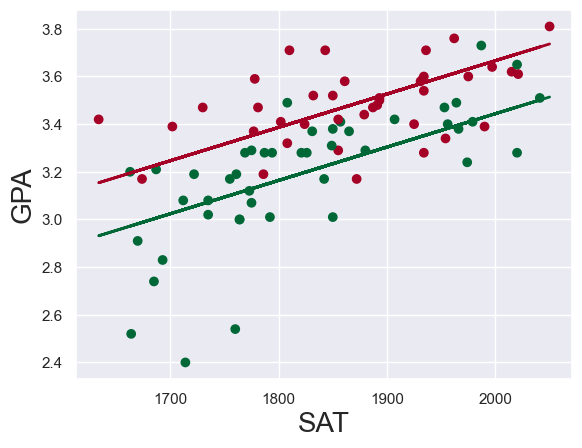

In [90]:
plt.scatter(data_dummies['SAT'],y,c=data_dummies['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 *data_dummies['SAT']
yhat_yes = 0.8665 + 0.0014 *data_dummies['SAT']
fig = plt.plot(data_dummies['SAT'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data_dummies['SAT'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

#### In the chart above we can clearly see the difference between the students who attendant more than 75% and the students who don't.

# Making Predictions

In [119]:
x = sm.add_constant(x1)
x.head()

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0


### Lets predict:
    1 - Joe, who got 1700 on the SAT and did not attend(attendance)
    2 - Monica, who got 1670 on the SAT and Attended (attendance)


In [97]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700, 1670],'Attendance':[0,1] })
new_data = new_data[['const', 'SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [98]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [113]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined =  new_data.join(predictionsdf)
joined.rename(index={0:'Joey', 1:'Monica'})

,const,SAT,Attendance,Predictions
Joey,1,1700,0,3.023513
Monica,1,1670,1,3.204163


### Analyzing the results

We can see that Joe has a higher SAT score than Monica but he has a lower GPA prediction. Its because Monica has attended more than 75% of the classes while Joey didn't, as we can note in the dummy column..

If we were using our original regression without the dummy variable (GPA = 0.2750 + 0.0017 * SAT), Joey would get a higher score than Monica. With the dummy variable the model is able to capture this important additional information and perform a better prediction.
